In [1]:
import pickle
import pandas as pd

In [2]:
with open('time-series-prediction-model.pkl', 'rb') as file:
    model = pickle.load(file)

In [15]:
from sklearn.preprocessing import MinMaxScaler


new_data = pd.read_csv('daily-climate.csv', usecols=[1], engine='python')

new_dataset = new_data.values
new_dataset = new_dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
new_dataset = scaler.fit_transform(new_dataset)

In [16]:
import numpy


def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
look_back = 7
X_data, Y_data = create_dataset(new_dataset, look_back)

X_new = numpy.reshape(X_data, (X_data.shape[0], 1, X_data.shape[1]))

In [18]:
prediced_data = model.predict(X_new)

49/49 [==============================] - 0s 2ms/step


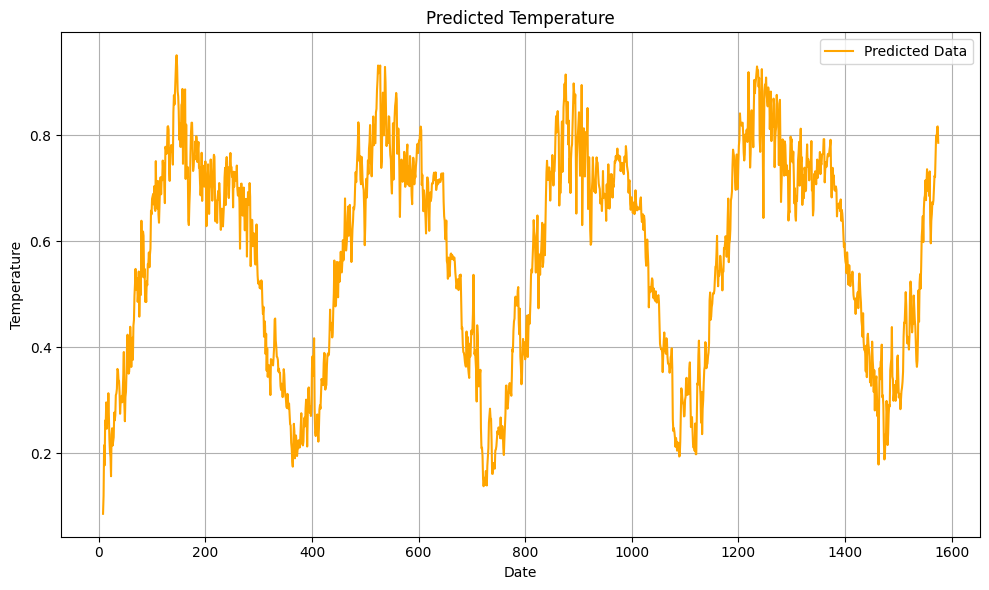

In [19]:
from matplotlib import pyplot as plt


dates = new_data.index[-len(prediced_data):]  # Use the last 'len(predictions_new)' dates

# Plot the predicted data
plt.figure(figsize=(10, 6))
plt.plot(dates, prediced_data, label='Predicted Data', color='orange')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Predicted Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()